In [6]:
import pygrib

In [7]:
grbs = pygrib.open('/Users/satyamsharma/Documents/CAPSTONE/Project/DATA/model/namanl_218_20171229_1800_000.grb2')

In [8]:
grbs

In [9]:
grbs.seek(0)
for g in grbs:
    print(g)

1:Pressure reduced to MSL:Pa (instant):lambert:meanSea:level 0:fcst time 0 hrs:from 201712291800
2:Derived radar reflectivity:dB (instant):lambert:hybrid:level 1:fcst time 0 hrs:from 201712291800
3:Maximum/Composite radar reflectivity:dB (instant):lambert:unknown:level 0 200:fcst time 0 hrs:from 201712291800
4:Visibility:m (instant):lambert:surface:level 0:fcst time 0 hrs:from 201712291800
5:Visibility:m (instant):lambert:cloudTop:level 0:fcst time 0 hrs:from 201712291800
6:Blackadar mixing length scale:m (instant):lambert:hybrid:level 1:fcst time 0 hrs:from 201712291800
7:Geopotential Height:gpm (instant):lambert:unknown:level 0 220:fcst time 0 hrs:from 201712291800
8:U component of wind:m s**-1 (instant):lambert:unknown:level 0 220:fcst time 0 hrs:from 201712291800
9:V component of wind:m s**-1 (instant):lambert:unknown:level 0 220:fcst time 0 hrs:from 201712291800
10:Ventilation Rate:m**2 s**-1 (instant):lambert:unknown:level 0 220:fcst time 0 hrs:from 201712291800
11:Wind speed (gu

108:Vertical velocity:Pa s**-1 (instant):lambert:isobaricInhPa:level 32500 Pa:fcst time 0 hrs:from 201712291800
109:Geometric vertical velocity:m s**-1 (instant):lambert:isobaricInhPa:level 32500 Pa:fcst time 0 hrs:from 201712291800
110:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 32500 Pa:fcst time 0 hrs:from 201712291800
111:V component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 32500 Pa:fcst time 0 hrs:from 201712291800
112:Turbulent kinetic energy:J kg**-1 (instant):lambert:isobaricInhPa:level 32500 Pa:fcst time 0 hrs:from 201712291800
113:Geopotential Height:gpm (instant):lambert:isobaricInhPa:level 35000 Pa:fcst time 0 hrs:from 201712291800
114:Temperature:K (instant):lambert:isobaricInhPa:level 35000 Pa:fcst time 0 hrs:from 201712291800
115:Relative humidity:% (instant):lambert:isobaricInhPa:level 35000 Pa:fcst time 0 hrs:from 201712291800
116:Vertical velocity:Pa s**-1 (instant):lambert:isobaricInhPa:level 35000 Pa:fcst time 0 hrs:from 2017122918

207:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 62500 Pa:fcst time 0 hrs:from 201712291800
208:V component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 62500 Pa:fcst time 0 hrs:from 201712291800
209:Turbulent kinetic energy:J kg**-1 (instant):lambert:isobaricInhPa:level 62500 Pa:fcst time 0 hrs:from 201712291800
210:Geopotential Height:gpm (instant):lambert:isobaricInhPa:level 65000 Pa:fcst time 0 hrs:from 201712291800
211:Temperature:K (instant):lambert:isobaricInhPa:level 65000 Pa:fcst time 0 hrs:from 201712291800
212:Relative humidity:% (instant):lambert:isobaricInhPa:level 65000 Pa:fcst time 0 hrs:from 201712291800
213:Vertical velocity:Pa s**-1 (instant):lambert:isobaricInhPa:level 65000 Pa:fcst time 0 hrs:from 201712291800
214:Geometric vertical velocity:m s**-1 (instant):lambert:isobaricInhPa:level 65000 Pa:fcst time 0 hrs:from 201712291800
215:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 65000 Pa:fcst time 0 hrs:from 201712291

307:Turbulent kinetic energy:J kg**-1 (instant):lambert:isobaricInhPa:level 92500 Pa:fcst time 0 hrs:from 201712291800
308:Geopotential Height:gpm (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712291800
309:Temperature:K (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712291800
310:Relative humidity:% (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712291800
311:Vertical velocity:Pa s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712291800
312:Geometric vertical velocity:m s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712291800
313:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712291800
314:V component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712291800
315:Turbulent kinetic energy:J kg**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201

415:Temperature:K (instant):lambert:pressureFromGroundLayer:levels 9000-6000 Pa:fcst time 0 hrs:from 201712291800
416:Relative humidity:% (instant):lambert:pressureFromGroundLayer:levels 9000-6000 Pa:fcst time 0 hrs:from 201712291800
417:U component of wind:m s**-1 (instant):lambert:pressureFromGroundLayer:levels 9000-6000 Pa:fcst time 0 hrs:from 201712291800
418:V component of wind:m s**-1 (instant):lambert:pressureFromGroundLayer:levels 9000-6000 Pa:fcst time 0 hrs:from 201712291800
419:Temperature:K (instant):lambert:pressureFromGroundLayer:levels 12000-9000 Pa:fcst time 0 hrs:from 201712291800
420:Relative humidity:% (instant):lambert:pressureFromGroundLayer:levels 12000-9000 Pa:fcst time 0 hrs:from 201712291800
421:U component of wind:m s**-1 (instant):lambert:pressureFromGroundLayer:levels 12000-9000 Pa:fcst time 0 hrs:from 201712291800
422:V component of wind:m s**-1 (instant):lambert:pressureFromGroundLayer:levels 12000-9000 Pa:fcst time 0 hrs:from 201712291800
423:Temperature:

In [10]:
grbs.seek(0)
for g in grbs:
    print("\n level")
    print(g.level)
    print("\n name")
    print(g.name)
    print("\n")
    print("\n")


 level
0

 name
Pressure reduced to MSL





 level
1

 name
Derived radar reflectivity





 level
0

 name
Maximum/Composite radar reflectivity





 level
0

 name
Visibility





 level
0

 name
Visibility





 level
1

 name
Blackadar mixing length scale





 level
0

 name
Geopotential Height





 level
0

 name
U component of wind





 level
0

 name
V component of wind





 level
0

 name
Ventilation Rate





 level
0

 name
Wind speed (gust)





 level
0

 name
unknown





 level
5

 name
Geometric vertical velocity





 level
10

 name
Geometric vertical velocity





 level
20

 name
Geometric vertical velocity





 level
50

 name
Geopotential Height





 level
50

 name
Temperature





 level
50

 name
Relative humidity





 level
50

 name
Vertical velocity





 level
50

 name
Geometric vertical velocity





 level
50

 name
U component of wind





 level
50

 name
V component of wind





 level
50

 name
Turbulent kinetic energy





 level
75

 name
G


 name
Geopotential Height





 level
600

 name
Temperature





 level
600

 name
Relative humidity





 level
600

 name
Vertical velocity





 level
600

 name
Geometric vertical velocity





 level
600

 name
U component of wind





 level
600

 name
V component of wind





 level
600

 name
Turbulent kinetic energy





 level
625

 name
Geopotential Height





 level
625

 name
Temperature





 level
625

 name
Relative humidity





 level
625

 name
Vertical velocity





 level
625

 name
Geometric vertical velocity





 level
625

 name
U component of wind





 level
625

 name
V component of wind





 level
625

 name
Turbulent kinetic energy





 level
650

 name
Geopotential Height





 level
650

 name
Temperature





 level
650

 name
Relative humidity





 level
650

 name
Vertical velocity





 level
650

 name
Geometric vertical velocity





 level
650

 name
U component of wind





 level
650

 name
V component of wind





 level
650

 name
Turbul

 level
0

 name
Transpiration stress-onset (soil moisture)





 level
500

 name
Surface lifted index





 level
0

 name
Convective available potential energy





 level
0

 name
Convective inhibition





 level
0

 name
Precipitable water





 level
0

 name
Geopotential Height





 level
3000

 name
Storm relative helicity





 level
0

 name
Vertical u-component shear





 level
0

 name
Vertical v-component shear





 level
0

 name
Pressure





 level
0

 name
Temperature





 level
0

 name
U component of wind





 level
0

 name
V component of wind





 level
0

 name
Pressure





 level
0

 name
U component of wind





 level
0

 name
V component of wind





 level
80

 name
Temperature





 level
80

 name
Specific humidity





 level
80

 name
Pressure





 level
80

 name
U component of wind





 level
80

 name
V component of wind





 level
0

 name
Geopotential Height





 level
0

 name
Relative humidity





 level
3000

 name
Temperature





 le

In [11]:
type(grbs[1])

pygrib.gribmessage

In [221]:
import numpy as np
grbs.seek(0)
i = 0;
for gc in grbs:
    i+=1;
    
print(i)

446


In [12]:
grbs[1].latlon()

RuntimeError: Key/value not found

In [ ]:
grbs.seek(0)
for s in grbs[1]
    print(s)

In [ ]:
grbs.seek(0)
for i in range(1, 447):
    if(grbs[1].keys() != grbs[i].keys()):
        print(i)
        print("\n not same")
        print("\n\n")

In [255]:
grbs[1].average

102312.53982373857

In [256]:
np.mean(grbs[1].values)

102312.53

In [254]:
grbs.select(name='Temperature')

[17:Temperature:K (instant):lambert:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 201712291800,
 25:Temperature:K (instant):lambert:isobaricInhPa:level 7500 Pa:fcst time 0 hrs:from 201712291800,
 33:Temperature:K (instant):lambert:isobaricInhPa:level 10000 Pa:fcst time 0 hrs:from 201712291800,
 41:Temperature:K (instant):lambert:isobaricInhPa:level 12500 Pa:fcst time 0 hrs:from 201712291800,
 49:Temperature:K (instant):lambert:isobaricInhPa:level 15000 Pa:fcst time 0 hrs:from 201712291800,
 57:Temperature:K (instant):lambert:isobaricInhPa:level 17500 Pa:fcst time 0 hrs:from 201712291800,
 65:Temperature:K (instant):lambert:isobaricInhPa:level 20000 Pa:fcst time 0 hrs:from 201712291800,
 73:Temperature:K (instant):lambert:isobaricInhPa:level 22500 Pa:fcst time 0 hrs:from 201712291800,
 81:Temperature:K (instant):lambert:isobaricInhPa:level 25000 Pa:fcst time 0 hrs:from 201712291800,
 90:Temperature:K (instant):lambert:isobaricInhPa:level 27500 Pa:fcst time 0 hrs:from 201712291800,
 9

In [233]:
grbs.select(name='Temperature')[2].keys()

[u'parametersVersion',
 u'UseEcmfConventions',
 u'GRIBEX_boustrophedonic',
 u'hundred',
 u'globalDomain',
 u'GRIBEditionNumber',
 u'tablesVersionLatest',
 u'grib2divider',
 u'angularPrecision',
 u'missingValue',
 u'ieeeFloats',
 u'isHindcast',
 u'section0Length',
 u'identifier',
 u'discipline',
 u'editionNumber',
 u'totalLength',
 u'sectionNumber',
 u'section1Length',
 u'numberOfSection',
 u'centre',
 u'centreDescription',
 u'subCentre',
 u'tablesVersion',
 u'masterDir',
 u'localTablesVersion',
 u'significanceOfReferenceTime',
 u'year',
 u'month',
 u'day',
 u'hour',
 u'minute',
 u'second',
 u'dataDate',
 u'julianDay',
 u'dataTime',
 u'productionStatusOfProcessedData',
 u'typeOfProcessedData',
 u'selectStepTemplateInterval',
 u'selectStepTemplateInstant',
 u'stepType',
 u'setCalendarId',
 u'deleteCalendarId',
 u'is_uerra',
 u'sectionNumber',
 u'grib2LocalSectionPresent',
 u'sectionNumber',
 u'gridDescriptionSectionPresent',
 u'section3Length',
 u'numberOfSection',
 u'sourceOfGridDefinit

In [217]:
np.size(grbs.select(name='Temperature'))

48

In [263]:
print(grbs.select(name='Temperature')[2].values)
print(np.shape(grbs.select(name='Temperature')[2].values))

[[194.99998 194.99998 194.99998 ... 194.09999 194.09999 194.09999]
 [195.09999 195.09999 195.09999 ... 194.09999 194.09999 194.09999]
 [195.2     195.2     195.2     ... 194.09999 194.09999 194.09999]
 ...
 [223.2     223.3     223.3     ... 221.90001 222.      222.     ]
 [223.3     223.3     223.3     ... 221.90001 221.90001 221.90001]
 [223.3     223.3     223.3     ... 221.8     221.8     221.90001]]
(428, 614)


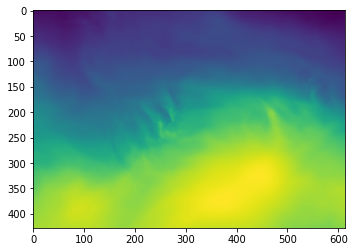

In [266]:
import pylab as plt
plt.imshow(grbs.select(name='Temperature')[2].values)
plt.show()

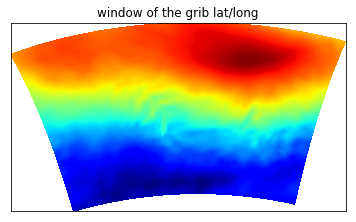

In [22]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

grb = grbs.select(name='Temperature')[0]
data=grb.values
lat,lon = grb.latlons()


m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

x, y = m(lon,lat)
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)

plt.title('window of the grib lat/long')
plt.show()

array([[-133.459     , -133.35389085, -133.24873431, ...,  -65.34276887,
         -65.23414071,  -65.12555139],
       [-133.48966029, -133.38447651, -133.27924523, ...,  -65.31859589,
         -65.20988495,  -65.10121294],
       [-133.52036817, -133.41510967, -133.30980355, ...,  -65.29438411,
         -65.18559027,  -65.07683545],
       ...,
       [-152.74480881, -152.59758855, -152.4502235 , ...,  -49.84322959,
         -49.6848239 ,  -49.52654667],
       [-152.81164297, -152.66429559, -152.51680298, ...,  -49.78833966,
         -49.62977099,  -49.47133121],
       [-152.8786225 , -152.73114787, -152.58352756, ...,  -49.73332112,
         -49.5745892 ,  -49.41598659]])

In [ ]:

Convert the lat/lon values to x/y projections.
x, y = m(lon,lat)
Next, plot the field using the fast pcolormesh routine and set the colormap to jet.
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
Add a colorbar and title, and then show the plot.
plt.colorbar(cs,orientation='vertical')
plt.title('Example 2: NWW3 Significant Wave Height from GRiB')
plt.show()

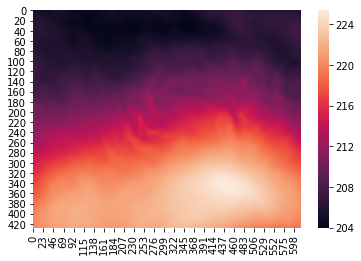

In [35]:
ax = sns.heatmap(temp_surf)

In [36]:
import pygrib
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [37]:
for grb in grbs[:5]:
    print grb

1:Pressure reduced to MSL:Pa (instant):lambert:meanSea:level 0:fcst time 0 hrs:from 201712291800
2:Derived radar reflectivity:dB (instant):lambert:hybrid:level 1:fcst time 0 hrs:from 201712291800
3:Maximum/Composite radar reflectivity:dB (instant):lambert:unknown:level 0 200:fcst time 0 hrs:from 201712291800
4:Visibility:m (instant):lambert:surface:level 0:fcst time 0 hrs:from 201712291800
5:Visibility:m (instant):lambert:cloudTop:level 0:fcst time 0 hrs:from 201712291800


In [38]:
print grb.keys()

[u'parametersVersion', u'UseEcmfConventions', u'GRIBEX_boustrophedonic', u'hundred', u'globalDomain', u'GRIBEditionNumber', u'tablesVersionLatest', u'grib2divider', u'angularPrecision', u'missingValue', u'ieeeFloats', u'isHindcast', u'section0Length', u'identifier', u'discipline', u'editionNumber', u'totalLength', u'sectionNumber', u'section1Length', u'numberOfSection', u'centre', u'centreDescription', u'subCentre', u'tablesVersion', u'masterDir', u'localTablesVersion', u'significanceOfReferenceTime', u'year', u'month', u'day', u'hour', u'minute', u'second', u'dataDate', u'julianDay', u'dataTime', u'productionStatusOfProcessedData', u'typeOfProcessedData', u'selectStepTemplateInterval', u'selectStepTemplateInstant', u'stepType', u'setCalendarId', u'deleteCalendarId', u'is_uerra', u'sectionNumber', u'grib2LocalSectionPresent', u'sectionNumber', u'gridDescriptionSectionPresent', u'section3Length', u'numberOfSection', u'sourceOfGridDefinition', u'numberOfDataPoints', u'numberOfOctectsForN

In [39]:
lats, lons = grb.latlons()  # get the lats and lons for the grid.
print 'min/max lat and lon',lats.min(), lats.max(), lons.min(), lons.max()

min/max lat and lon 12.190000000000017 61.30935757335814 -152.87862250405013 -49.415986585644376


In [42]:
fig = plt.figure(figsize=(16,35))
m = Basemap(projection='lcc',lon_0=-74,lat_0=41,width=4.e6,height=4.e6)


<Figure size 1152x2520 with 0 Axes>

In [56]:
# basic NOMADS OpenDAP extraction and plotting script
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

# set up the figure
plt.figure()

# set up the URL to access the data server.
# See the NWW3 directory on NOMADS 
# for the list of available model run dates.

#mydate='20180424'
#url='http://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+ \
    mydate+'/nww3'+mydate+'_00z'

# Extract the significant wave height of combined wind waves and swell

file = netCDF4.Dataset(url)
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['htsgwsfc'][1,:,:]
file.close()

# Since Python is object oriented, you can explore the contents of the NOMADS
# data set by examining the file object, such as file.variables.

# The indexing into the data set used by netCDF4 is standard python indexing.
# In this case we want the first forecast step, but note that the first time 
# step in the RTOFS OpenDAP link is all NaN values.  So we start with the 
# second timestep

# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:

m=Basemap(projection='lcc',lat_ts=10,llcrnrlon=82, \
  urcrnrlon=102,llcrnrlat=131,urcrnrlat=41, \
  resolution='c')

# convert the lat/lon values to x/y projections.

#x, y = m(*np.meshgrid(lon,lat))

# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

#m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
#m.colorbar(location='right')

# Add a coastline and axis values.

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.

plt.title('Example 1: NWW3 Significant Wave Height from NOMADS')
plt.show()

ValueError: llcrnrlat must be between -90.000000 and 90.000000 degrees

<Figure size 432x288 with 0 Axes>

In [46]:
file = netCDF4.Dataset(url)
file

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    title: WAVE_nww3 Global wave model fcst from 00Z24apr2018, downloaded Apr 24 04:33 UTC
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Tue Apr 24 17:31:44 UTC 2018 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(157), lon(288), time(61)
    variables(dimensions): float64 time(time), float64 lat(lat), float64 lon(lon), float32 dirpwsfc(time,lat,lon), float32 dirswsfc(time,lat,lon), float32 htsgwsfc(time,lat,lon), float32 perpwsfc(time,lat,lon), float32 perswsfc(time,lat,lon), float32 ugrdsfc(time,lat,lon), float32 vgrdsfc(time,lat,lon), float32 wdirsfc(time,lat,lon), float32 windsfc(time,lat,lon), float32 wvdirsfc(time,lat,lon), float32 wvpersfc(time,lat,lon)
    groups: 

In [48]:
file.variables

OrderedDict([(u'time', <type 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  grads_dim: t
                  grads_mapping: linear
                  grads_size: 61
                  grads_min: 00z24apr2018
                  grads_step: 3hr
                  units: days since 1-1-1 00:00:0.0
                  long_name: time
                  minimum: 00z24apr2018
                  maximum: 12z01may2018
                  resolution: 0.125
              unlimited dimensions: 
              current shape = (61,)
              filling off), (u'lat', <type 'netCDF4._netCDF4.Variable'>
              float64 lat(lat)
                  grads_dim: y
                  grads_mapping: linear
                  grads_size: 157
                  units: degrees_north
                  long_name: latitude
                  minimum: -78.0
                  maximum: 78.0
                  resolution: 1.0
              unlimited dimensions: 
              current shape = (15

In [54]:
help(Basemap)

Help on class Basemap in module mpl_toolkits.basemap:

class Basemap(__builtin__.object)
 |  Methods defined here:
 |  
 |  __call__(self, x, y, inverse=False)
 |      Calling a Basemap class instance with the arguments lon, lat will
 |      convert lon/lat (in degrees) to x/y map projection
 |      coordinates (in meters).  If optional keyword ``inverse`` is
 |      True (default is False), the inverse transformation from x/y
 |      to lon/lat is performed.
 |      
 |      For cylindrical equidistant projection (``cyl``), this
 |      does nothing (i.e. x,y == lon,lat).
 |      
 |      For non-cylindrical projections, the inverse transformation
 |      always returns longitudes between -180 and 180 degrees. For
 |      cylindrical projections (self.projection == ``cyl``,
 |      ``cea``, ``mill``, ``gall`` or ``merc``)
 |      the inverse transformation will return longitudes between
 |      self.llcrnrlon and self.llcrnrlat.
 |      
 |      Input arguments lon, lat can be either 

In [15]:
from mpl_toolkits.basemap import Basemap
grb = grbs.select(name='Temperature')[0]
lat,lon = grb.latlons()

In [16]:
lat

array([[12.19      , 12.21990762, 12.24973893, ..., 14.38904238,
        14.36560516, 14.34208538],
       [12.29273251, 12.32267489, 12.35254086, ..., 14.49429696,
        14.47083322, 14.44728683],
       [12.39549779, 12.4254749 , 12.45537549, ..., 14.59958178,
        14.57609156, 14.55251859],
       ...,
       [54.39421312, 54.43302674, 54.47172967, ..., 57.21664499,
        57.18690273, 57.15704829],
       [54.47983077, 54.51864755, 54.55735358, ..., 57.30239504,
        57.27265243, 57.24279762],
       [54.56534318, 54.60416302, 54.64287208, ..., 57.38803367,
        57.35829077, 57.32843565]])

In [17]:
lon

array([[-133.459     , -133.35389085, -133.24873431, ...,  -65.34276887,
         -65.23414071,  -65.12555139],
       [-133.48966029, -133.38447651, -133.27924523, ...,  -65.31859589,
         -65.20988495,  -65.10121294],
       [-133.52036817, -133.41510967, -133.30980355, ...,  -65.29438411,
         -65.18559027,  -65.07683545],
       ...,
       [-152.74480881, -152.59758855, -152.4502235 , ...,  -49.84322959,
         -49.6848239 ,  -49.52654667],
       [-152.81164297, -152.66429559, -152.51680298, ...,  -49.78833966,
         -49.62977099,  -49.47133121],
       [-152.8786225 , -152.73114787, -152.58352756, ...,  -49.73332112,
         -49.5745892 ,  -49.41598659]])